# Progrma de Filtros gaussinos/laplace em py



utilizando a biblioteca do openCv e algumas outras...


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Sobel
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)

# Combinar os gradientes
sobel_combinado = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalizar a imagem resultante para o intervalo 0-255
sobel_combinado = np.uint8(255 * sobel_combinado / np.max(sobel_combinado))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Sobel aplicado
plt.subplot(122)
plt.imshow(sobel_combinado, cmap='gray')
plt.title('Filtro Sobel Aplicado')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
from tkinter import Tk, PhotoImage
from tkinter import Entry as tkEntry
from tkinter.ttk import Frame, Label, Button, Entry, Separator, Style


'''
Title: Modern Interface for Python with Tkinter
by ngoma for Tabnews, 29.11.2022, Huambo-Angola
'''

# funcoes
def login():
    et_email.delete(0, 'end')
    et_senha.delete(0, 'end')
    et_email.focus_force()

def nova_conta():
    et_email.focus_force()

# primeira linha
root = Tk()

# frames
borda = Frame(root, style='Borda.TFrame')
borda.pack(fill='x', expand=True)

topo = Frame(borda)
topo.pack()

centro = Frame(borda)
centro.pack()

base = Frame(borda)
base.pack()

logo = PhotoImage(file='D:/EDA/py/imagePy/running-rushing.GIF')
lb_logo = Label(topo, image=logo)
lb_logo.image = logo
lb_logo.pack()

Label(centro, text='E-mail').pack(anchor='w', pady=(10,0))
et_email = tkEntry(centro, font=('Montserrat', 12, 'bold'), fg='#666', relief='flat', 
        highlightbackground='white', highlightcolor='white')
et_email.focus_force()
et_email.pack(fill='x')
Separator(centro, orient='horizontal').pack(fill='x')

Label(centro, text='Senha').pack(anchor='w', pady=(10,0))
et_senha =  tkEntry(centro, show='*', font=('Montserrat', 12, 'bold'), fg='#666', relief='flat', 
        highlightbackground='white', highlightcolor='white')
et_senha.pack()
Separator(centro, orient='horizontal').pack(fill='x', pady=(0,20))

Button(base, text='ENTRAR', command=login, cursor='hand1').pack(fill='x', pady=(0,10))
Label(base, text='Ainda não tens uma conta? ', style='Small.TLabel').pack(side='left')
Button(base, text='Crie agora.', command=nova_conta, cursor='hand1', style='Small.TButton').pack(side='left')


# fontes
Tfont = ('Montserrat ExtraBold', 22)
Pfont = ('Montserrat', 10)
Pfontb = ('Montserrat', 12, 'bold')
Sfont = ('Montserrat', 8)


# estilo
style = Style()
style.theme_use('default')
style.configure('TFrame', background='#fff')
style.configure('Borda.TFrame', width=300)
style.configure('TLabel', justify='right', font=Pfont, background='#fff', foreground='#808080')
style.configure('Small.TLabel', font=Sfont)
style.configure('TButton', padding=(60,7), font=Pfontb, foreground='#fff', background='#20bcbb', relief='')
style.configure('Small.TButton', padding=(0,-3), font=Sfont, width=0, height=0, foreground='#20bcbb', background='#fff', relief='')
style.configure('TSeparator', background='#bafafa')

style.map('TButton',
        foreground=[('pressed', '#e25ca5'), ('active', '#fff')],
        background=[('pressed', '!focus', '#3f8efc'), ('active', '#025b5a')],
        relief=[('pressed', 'flat'), ('!pressed', 'flat')])

style.map('Small.TButton',
        foreground=[('pressed', '#f3bb30'), ('active', '#025b5a')],
        background=[('pressed', '!focus', '#3f8efc'), ('active', '#fff')],
        relief=[('pressed', 'flat'), ('!pressed', 'flat')])

# ultimas linhas
root.title('Design moderno - tkinter')
root.geometry('400x550+100+100')
root.iconphoto(False, PhotoImage(file= r'D:\EDA\py\imagePy\apple.png'))
root.configure(bg='#fff')
root.mainloop()

In [4]:
import pyodbc 
import tkinter as tk
from tkinter import *
from tkinter import ttk, filedialog
import ttkbootstrap as ttkbs
from ttkbootstrap.constants import *
import cv2
import numpy as np
from PIL import Image, ImageTk

imagem_global = None
imagem_sobel = None  # Variável global para armazenar a imagem com filtro Sobel

def abrir_imagem():
    global imagem_global, imagem_sobel  # Declara as variáveis globais
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência
        imagem_global = np.array(img)  # Converte a imagem PIL para NumPy

        # Aplica o filtro Sobel imediatamente após carregar a imagem
        aplicar_filtro('xy')

        # Mostra os botões após carregar a imagem
        btn_frame.pack(pady=10)

def aplicar_filtro(filtro):
    global imagem_global, imagem_sobel
    if imagem_global is not None:
        imagem_gray = cv2.cvtColor(imagem_global, cv2.COLOR_RGB2GRAY)
        if filtro == 'x':
            sobel = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
        elif filtro == 'y':
            sobel = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
        elif filtro == 'xy':  # Aplica ambos os filtros e combina
            sobel_x = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
            sobel = np.sqrt(sobel_x**2 + sobel_y**2)

        sobel_normalizado = np.uint8(255 * (sobel - np.min(sobel)) / (np.max(sobel) - np.min(sobel)))
        imagem_sobel = Image.fromarray(sobel_normalizado)
        imagem_sobel.thumbnail((400, 400))
        img_sobel_tk = ImageTk.PhotoImage(imagem_sobel)
        
        lbl_imagem_sobel.config(image=img_sobel_tk)
        lbl_imagem_sobel.image = img_sobel_tk

def remover_filtro():
    global imagem_global
    if imagem_global is not None:
        img_tk = ImageTk.PhotoImage(Image.fromarray(imagem_global))
        lbl_imagem_sobel.config(image=img_tk)
        lbl_imagem_sobel.image = img_tk  # Atualiza a imagem

def aplicar_filtro_xy():
    aplicar_filtro('xy')  # Reaplica o filtro Sobel XY

# Cria a janela principal
janela = ttkbs.Window(themename="darkly")
janela.title("Tela de Seleção de Imagem")
janela.configure(bg="#333")

# Define o tamanho da janela e a centraliza
janela.geometry("900x500")
largura_tela = janela.winfo_screenwidth()
altura_tela = janela.winfo_screenheight()
pos_x = (largura_tela // 2) - (900 // 2)
pos_y = (altura_tela // 2) - (500 // 2)
janela.geometry(f"900x500+{pos_x}+{pos_y}")

menu_principal = Menu(janela)
janela.config(menu=menu_principal)

menu_opcoes = Menu(menu_principal, tearoff=0, bg="#1f4b99", fg="white", activebackground="#4a6fa5", activeforeground="white")
menu_principal.add_cascade(label="Menu", menu=menu_opcoes)
menu_opcoes.add_command(label="Add imagem", command=abrir_imagem)
menu_opcoes.add_command(label="Sair", command=janela.destroy)

# Layout principal
frame = tk.Frame(janela, bg="#333")
frame.pack(pady=20)

lbl_imagem = tk.Label(frame, bg="#333")
lbl_imagem.grid(row=0, column=0, padx=(20, 10))  # Imagem original

lbl_imagem_sobel = tk.Label(frame, bg="#333")
lbl_imagem_sobel.grid(row=0, column=1, padx=(10, 20))  # Imagem com filtro

# Botões para aplicar filtros e remover filtro (inicialmente ocultos)
btn_frame = tk.Frame(janela, bg="#333")

btn_sobel_x = tk.Button(btn_frame, text="Filtro Sobel em X", command=lambda: aplicar_filtro('x'), bg="#1f4b99", fg="white")
btn_sobel_x.pack(side=tk.LEFT, padx=5)

btn_sobel_y = tk.Button(btn_frame, text="Filtro Sobel em Y", command=lambda: aplicar_filtro('y'), bg="#1f4b99", fg="white")
btn_sobel_y.pack(side=tk.LEFT, padx=5)

btn_sobel_xy = tk.Button(btn_frame, text="Filtro Sobel XY", command=aplicar_filtro_xy, bg="#1f4b99", fg="white")
btn_sobel_xy.pack(side=tk.LEFT, padx=5)

btn_remover_filtro = tk.Button(btn_frame, text="Remover Filtro", command=remover_filtro, bg="#1f4b99", fg="white")
btn_remover_filtro.pack(side=tk.LEFT, padx=5)

# Inicia o loop da interface gráfica
janela.mainloop()


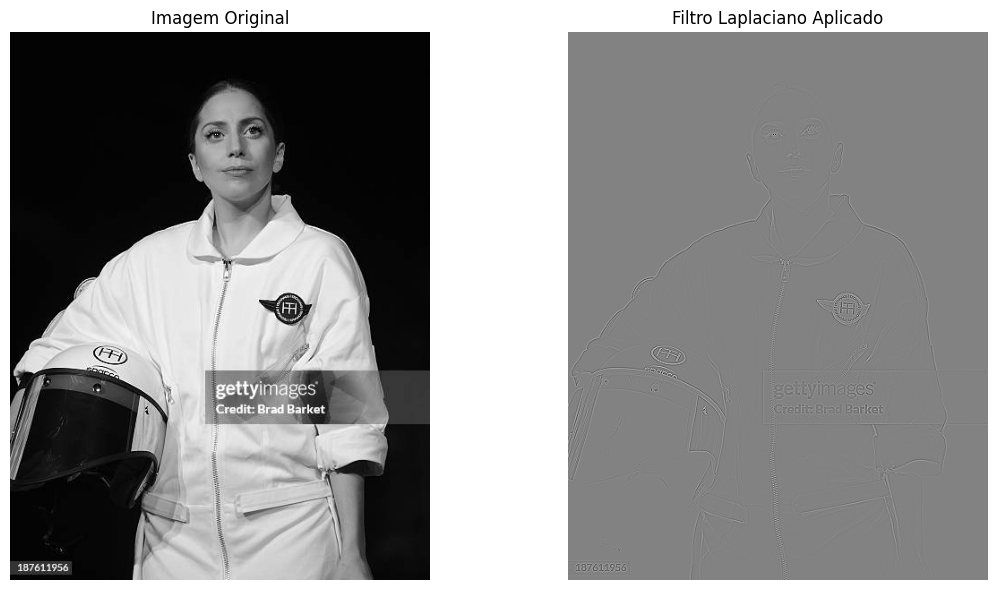

In [1]:
# laplace 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Laplaciano
laplaciano = cv2.Laplacian(imagem, cv2.CV_64F)

# Normalizar a imagem resultante para o intervalo 0-255
laplaciano = np.uint8(255 * (laplaciano - np.min(laplaciano)) / (np.max(laplaciano) - np.min(laplaciano)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano aplicado
plt.subplot(122)
plt.imshow(laplaciano, cmap='gray')
plt.title('Filtro Laplaciano Aplicado')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


In [2]:
%matplotlib qt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Definir a máscara do filtro Laplaciano
laplaciano_mask = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Aplicar o filtro Laplaciano
laplaciano_simples = cv2.filter2D(imagem, -1, laplaciano_mask)

# Normalizar a imagem resultante
laplaciano_simples = np.uint8(255 * (laplaciano_simples - np.min(laplaciano_simples)) / (np.max(laplaciano_simples) - np.min(laplaciano_simples)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano simples aplicado
plt.subplot(122)
plt.imshow(laplaciano_simples, cmap='gray')
plt.title('Filtro Laplaciano Simples')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


In [1]:
%matplotlib qt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\onde-fazer-o-download-de-modelos-digitais-de-elevacao.jpg", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Gaussian
imagem_gauss = cv2.GaussianBlur(imagem, (5, 5), 0)

# Aplicar o filtro Laplaciano
laplaciano_gauss = cv2.Laplacian(imagem_gauss, cv2.CV_64F)

# Normalizar a imagem resultante
laplaciano_gauss = np.uint8(255 * (laplaciano_gauss - np.min(laplaciano_gauss)) / (np.max(laplaciano_gauss) - np.min(laplaciano_gauss)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano de Gaussian aplicado
plt.subplot(122)
plt.imshow(laplaciano_gauss, cmap='gray')
plt.title('Filtro Laplaciano de Gaussian (LoG)')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


In [4]:
%matplotlib qt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def aplicar_filtro_laplaciano(imagem, kernel_size=3):
    # Verificar se o tamanho do kernel é ímpar
    if kernel_size % 2 == 0:
        kernel_size += 1  # Se for par, incrementar para torná-lo ímpar

    # Definir a máscara do filtro Laplaciano
    laplaciano_mask = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    laplaciano_mask[kernel_size // 2, kernel_size // 2] = kernel_size * kernel_size - 1
    laplaciano_mask -= 1  # Define os outros valores como -1

    # Aplicar o filtro Laplaciano
    laplaciano = cv2.filter2D(imagem, -1, laplaciano_mask)
    return laplaciano

def atualizar(val):
    kernel_size = int(slider.val)
    laplaciano = aplicar_filtro_laplaciano(imagem, kernel_size)

    # Atualizar a imagem exibida
    ax2.clear()
    ax2.imshow(laplaciano, cmap='gray')
    ax2.set_title(f'Filtro Laplaciano (Kernel Size: {kernel_size})')
    ax2.axis('off')
    plt.draw()

# Carregar a imagem
imagem_path = r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG"
imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Configurar a figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

# Inicializar o filtro Laplaciano com kernel 3
laplaciano_inicial = aplicar_filtro_laplaciano(imagem, kernel_size=3)

# Exibir o filtro Laplaciano inicial
ax2.imshow(laplaciano_inicial, cmap='gray')
ax2.set_title('Filtro Laplaciano (Kernel Size: 3)')
ax2.axis('off')

# Criar a barra deslizante
axcolor = 'lightgoldenrodyellow'
ax_slider = plt.axes([0.1, 0.01, 0.8, 0.03], facecolor=axcolor)
slider = Slider(ax_slider, 'Kernel Size', 1, 50, valinit=3, valstep=1)

# Conectar o evento de atualização do slider
slider.on_changed(atualizar)

# Mostrar as imagens
plt.tight_layout()
plt.show()


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_19800\2860234386.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [18]:
%matplotlib qt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

#%matplotlib qt Adicione esta linha no início para forçar a janela interativa

# Ou alternativamente, use:
# %matplotlib notebook  # Para interatividade dentro do notebook

def aplicar_filtro_bilateral(imagem, d=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(imagem, d, sigma_color, sigma_space)

def fusao_imagens(imagem_original, imagem_filtrada, alpha=0.5):
    return cv2.addWeighted(imagem_original, alpha, imagem_filtrada, 1 - alpha, 0)

def atualizar(val):
    global imagem
    d = int(slider_d.val)
    sigma_color = slider_sigma_color.val
    sigma_space = slider_sigma_space.val
    alpha = slider_alpha.val

    imagem_filtrada = aplicar_filtro_bilateral(imagem, d, sigma_color, sigma_space)
    imagem_fusao = fusao_imagens(imagem, imagem_filtrada, alpha)

    ax2.clear()
    ax2.imshow(imagem_filtrada, cmap='gray')
    ax2.set_title(f'Filtro Bilateral\nd={d}, σ_color={sigma_color:.1f}, σ_space={sigma_space:.1f}')
    ax2.axis('off')

    ax3.clear()
    ax3.imshow(imagem_fusao, cmap='gray')
    ax3.set_title(f'Fusão de Imagens (α={alpha:.2f})')
    ax3.axis('off')
    
    fig.canvas.draw_idle()

# Carregar a imagem
imagem_path = r"D:\EDA\py\imagePy\onde-fazer-o-download-de-modelos-digitais-de-elevacao.jpg"
imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Configurar o estilo e layout
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(bottom=0.25)

# Configurar primeira imagem
ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

# Aplicar filtros iniciais
imagem_filtrada = aplicar_filtro_bilateral(imagem)
imagem_fusao = fusao_imagens(imagem, imagem_filtrada)

# Configurar segunda e terceira imagens
ax2.imshow(imagem_filtrada, cmap='gray')
ax2.set_title('Filtro Bilateral')
ax2.axis('off')

ax3.imshow(imagem_fusao, cmap='gray')
ax3.set_title('Fusão de Imagens')
ax3.axis('off')

# Criar sliders
axcolor = 'lightgoldenrodyellow'
slider_y_positions = [0.15, 0.1, 0.05, 0.01]

# Sliders
ax_slider_d = plt.axes([0.1, slider_y_positions[0], 0.65, 0.03], facecolor=axcolor)
slider_d = Slider(ax_slider_d, 'Diâmetro (d)', 1, 50, valinit=9, valstep=2)

ax_slider_sigma_color = plt.axes([0.1, slider_y_positions[1], 0.65, 0.03], facecolor=axcolor)
slider_sigma_color = Slider(ax_slider_sigma_color, 'Sigma Color (σ)', 1, 150, valinit=75)

ax_slider_sigma_space = plt.axes([0.1, slider_y_positions[2], 0.65, 0.03], facecolor=axcolor)
slider_sigma_space = Slider(ax_slider_sigma_space, 'Sigma Space (σ)', 1, 150, valinit=75)

ax_slider_alpha = plt.axes([0.1, slider_y_positions[3], 0.65, 0.03], facecolor=axcolor)
slider_alpha = Slider(ax_slider_alpha, 'Alpha (α)', 0, 1, valinit=0.5)

# Conectar eventos
for slider in [slider_d, slider_sigma_color, slider_sigma_space, slider_alpha]:
    slider.on_changed(atualizar)

plt.show()

In [16]:
%matplotlib qt

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider  # Importação necessária para o Slider
import pywt

def aplicar_filtro_fourier(imagem, cutoff=30):
    # Realizar a Transformada de Fourier
    f = np.fft.fft2(imagem)
    fshift = np.fft.fftshift(f)
    # Criação do filtro passa-baixa
    rows, cols = imagem.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]
    mask_area = x*x + y*y <= cutoff*cutoff
    mask[mask_area] = 1
    # Aplicar o filtro
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    imagem_filtrada = np.fft.ifft2(f_ishift)
    imagem_filtrada = np.abs(imagem_filtrada)
    
    return imagem_filtrada

def aplicar_wavelet(imagem):
    coeffs = pywt.wavedec2(imagem, 'haar', level=2)
    # Usando apenas a aproximação para a imagem final
    imagem_wavelet = pywt.waverec2(coeffs, 'haar')
    return imagem_wavelet

def atualizar_fourier(val):
    global imagem  # Necessário declarar como global
    cutoff = int(slider_cutoff.val)
    imagem_filtrada = aplicar_filtro_fourier(imagem, cutoff)
    ax2.clear()
    ax2.imshow(imagem_filtrada, cmap='gray')
    ax2.set_title(f'Filtro de Fourier (Cutoff: {cutoff})')
    ax2.axis('off')
    fig.canvas.draw_idle()  # Atualiza a figura corretamente

# Carregar a imagem
imagem_path = r"D:\EDA\py\imagePy\relevo\relevo_slz.png"
imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Configurar a figura
plt.style.use('default')  # Reseta o estilo para evitar problemas de renderização
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Ajustar o layout para dar espaço ao slider
plt.subplots_adjust(bottom=0.15)  # Aumenta o espaço inferior para o slider

ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

# Inicializar os filtros
imagem_filtrada_fourier = aplicar_filtro_fourier(imagem)
ax2.imshow(imagem_filtrada_fourier, cmap='gray')
ax2.set_title('Filtro de Fourier')
ax2.axis('off')

imagem_wavelet = aplicar_wavelet(imagem)
ax3.imshow(imagem_wavelet, cmap='gray')
ax3.set_title('Transformada de Wavelet')
ax3.axis('off')

# Criar a barra deslizante para o filtro de Fourier
axcolor = 'lightgoldenrodyellow'
ax_slider_cutoff = plt.axes([0.1, 0.02, 0.3, 0.03], facecolor=axcolor)
slider_cutoff = Slider(ax_slider_cutoff, 'Cutoff Frequency', 1, 100, valinit=30)

# Conectar o evento de atualização do slider
slider_cutoff.on_changed(atualizar_fourier)

plt.show()

USGS Earth Explorer – Imagens de satélite e modelos de elevação.
Copernicus Open Access Hub – Dados Sentinel.
NASA Earthdata – Dados de satélite e elevação.
OpenTopography – Dados LIDAR e DEMs.
Google Earth Engine – Plataforma para análise e extração de dados geoespaciais.
OpenStreetMap – Mapas vetoriais e dados de cobertura do solo.
SRTM – Modelos digitais de elevação.
IBGE – Dados geográficos e administrativos do Brasil.

#Filtro - Transformada de Fourier 


In [15]:
%matplotlib qt

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider  # Importação necessária para o Slider
import pywt

def aplicar_filtro_fourier(imagem, cutoff=30):
    # Realizar a Transformada de Fourier
    f = np.fft.fft2(imagem)
    fshift = np.fft.fftshift(f)
    # Criação do filtro passa-baixa
    rows, cols = imagem.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    y, x = np.ogrid[-crow:rows-crow, -ccol:cols-ccol]
    mask_area = x*x + y*y <= cutoff*cutoff
    mask[mask_area] = 1
    # Aplicar o filtro
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    imagem_filtrada = np.fft.ifft2(f_ishift)
    imagem_filtrada = np.abs(imagem_filtrada)
    
    return imagem_filtrada

def aplicar_wavelet(imagem):
    coeffs = pywt.wavedec2(imagem, 'haar', level=2)
    # Usando apenas a aproximação para a imagem final
    imagem_wavelet = pywt.waverec2(coeffs, 'haar')
    return imagem_wavelet

def atualizar_fourier(val):
    global imagem  # Necessário declarar como global
    cutoff = int(slider_cutoff.val)
    imagem_filtrada = aplicar_filtro_fourier(imagem, cutoff)
    ax2.clear()
    ax2.imshow(imagem_filtrada, cmap='gray')
    ax2.set_title(f'Filtro de Fourier (Cutoff: {cutoff})')
    ax2.axis('off')
    fig.canvas.draw_idle()  # Atualiza a figura corretamente

# Carregar a imagem
imagem_path = r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG"
imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Configurar a figura
plt.style.use('default')  # Reseta o estilo para evitar problemas de renderização
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Ajustar o layout para dar espaço ao slider
plt.subplots_adjust(bottom=0.15)  # Aumenta o espaço inferior para o slider

ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

# Inicializar os filtros
imagem_filtrada_fourier = aplicar_filtro_fourier(imagem)
ax2.imshow(imagem_filtrada_fourier, cmap='gray')
ax2.set_title('Filtro de Fourier')
ax2.axis('off')

imagem_wavelet = aplicar_wavelet(imagem)
ax3.imshow(imagem_wavelet, cmap='gray')
ax3.set_title('Transformada de Wavelet')
ax3.axis('off')

# Criar a barra deslizante para o filtro de Fourier
axcolor = 'lightgoldenrodyellow'
ax_slider_cutoff = plt.axes([0.1, 0.02, 0.3, 0.03], facecolor=axcolor)
slider_cutoff = Slider(ax_slider_cutoff, 'Cutoff Frequency', 1, 100, valinit=30)

# Conectar o evento de atualização do slider
slider_cutoff.on_changed(atualizar_fourier)

plt.show()

# FILtros laplacianos e Gaussianos 
 * filtros LoG
 * filtro wawet 
 * filtro sopbel 
 * filtro furrier 
 * filtro bilateral 
 * filtro gausss